Ein `Autoencoder` ist ein künstliches neuronales Netz, das dazu genutzt wird, effiziente Codierungen zu lernen. Das Ziel eines Autoencoders ist es, eine komprimierte Repräsentation (Encoding) für einen Satz Daten zu lernen und somit auch wesentliche Merkmale zu extrahieren. Dadurch kann er zur Dimensionsreduktion genutzt werden...
![Image](./data/autoencoder.png)

(60000, 784)
(10000, 784)
Epoch 1/200
235/235 [==============================] - 4s 13ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 2/200
235/235 [==============================] - 3s 13ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 3/200
235/235 [==============================] - 3s 13ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 4/200
235/235 [==============================] - 3s 13ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 5/200
235/235 [==============================] - 3s 12ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 6/200
235/235 [==============================] - 2s 10ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 7/200
235/235 [==============================] - 2s 9ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 8/200
235/235 [==============================] - 2s 11ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 9/200
235/235 [==============================] - 3s 12ms/step - loss: 0.6927 - val_loss: 0.6927
Epoch 10/200
235/235 [==============================] - 3

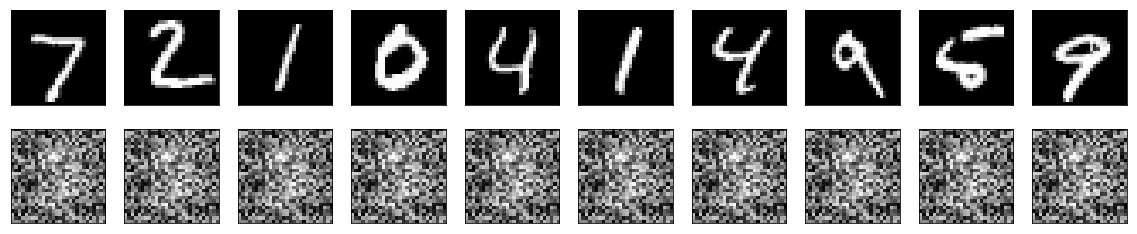

In [3]:
import keras

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

# die Größe unserer codierten Darstellungen 
encoding_dim = 2  # 32 floats 

# Platzhalter
input_img = Input(shape=(784,))
# Layer "encoded" ist die codierte Darstellung des Eingangs 
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" ist die verlustbehaftete Rekonstruktion des Eingangs 
decoded = Dense(784, activation='sigmoid')(encoded)

# dies modell mappt die eingangssignale auf 
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
print(train_images.shape)
print(test_images.shape)

autoencoder.fit(train_images, train_images,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(test_images, test_images))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
%matplotlib inline
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()